# Stock Changes
Let's evaluate stock price changes in several companies, and cluster them into a set of manageable groups. We'll be using the S&P 500 stok data dataset from kaggle (https://www.kaggle.com/datasets/camnugent/sandp500)

In [1]:
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split



df = pd.read_csv('all_Stocks_5yr.csv')


In [2]:
display(df)

,date,open,high,low,close,volume,Name
0,2013-02-08,15.07,15.12,14.63,14.75,8407500,AAL
1,2013-02-11,14.89,15.01,14.26,14.46,8882000,AAL
2,2013-02-12,14.45,14.51,14.10,14.27,8126000,AAL
3,2013-02-13,14.30,14.94,14.25,14.66,10259500,AAL
4,2013-02-14,14.94,14.96,13.16,13.99,31879900,AAL
...,...,...,...,...,...,...,...
619035,2018-02-01,76.84,78.27,76.69,77.82,2982259,ZTS
619036,2018-02-02,77.53,78.12,76.73,76.78,2595187,ZTS
619037,2018-02-05,76.64,76.92,73.18,73.83,2962031,ZTS
619038,2018-02-06,72.74,74.56,72.13,73.27,4924323,ZTS


# Transform structure
First we have to change the structure of our dataframe so that it better fits our needs

In [3]:
keep=['date', 'close', 'Name']
df_stocks=df[keep]
df_stocks = df_stocks.sort_values(by=['Name', 'date'])
pivot_df = df_stocks.pivot(index='Name', columns='date', values='close')


display(pivot_df)

date,2013-02-08,2013-02-11,2013-02-12,2013-02-13,2013-02-14,2013-02-15,2013-02-19,2013-02-20,2013-02-21,2013-02-22,...,2018-01-25,2018-01-26,2018-01-29,2018-01-30,2018-01-31,2018-02-01,2018-02-02,2018-02-05,2018-02-06,2018-02-07
Name,,,,,,,,,,,,,,,,,,,,,
A,45.0800,44.6000,44.6200,44.7500,44.5800,42.2500,43.0100,42.2400,41.6300,41.8000,...,73.86,74.82,74.53,72.99,73.43,72.83,71.25,68.22,68.45,68.06
AAL,14.7500,14.4600,14.2700,14.6600,13.9900,14.5000,14.2600,13.3300,13.3700,13.5700,...,53.05,53.07,52.68,52.59,54.32,53.88,52.10,49.76,51.18,51.40
AAP,78.9000,78.3900,78.6000,78.9700,78.8400,79.0000,80.7200,79.5000,79.0600,79.2100,...,120.92,123.64,122.89,119.27,116.99,117.29,113.93,109.86,112.20,109.93
AAPL,67.8542,68.5614,66.8428,66.7156,66.6556,65.7371,65.7128,64.1214,63.7228,64.4014,...,171.11,171.51,167.96,166.97,167.43,167.78,160.50,156.49,163.03,159.54
ABBV,36.2500,35.8500,35.4200,35.2700,36.5700,37.5800,38.1900,38.6100,38.7800,38.4600,...,108.30,123.21,122.31,115.88,112.22,116.34,115.17,109.51,111.20,113.62
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
XYL,27.0900,27.4600,27.9500,28.2600,28.4700,28.2800,28.7600,27.9600,27.6800,27.7900,...,73.24,74.41,73.41,73.07,72.26,74.84,75.66,72.66,71.33,71.79
YUM,65.3000,64.5500,64.7500,64.4100,63.8900,63.9900,65.1500,64.5600,65.0500,65.4500,...,85.66,86.20,86.48,84.59,84.59,83.98,82.63,79.80,80.58,80.13
ZBH,75.8500,75.6500,75.4400,76.0000,76.3400,75.9000,76.1100,75.3100,73.8700,74.1400,...,124.74,126.23,127.39,125.94,127.12,128.19,125.79,123.18,122.30,120.78


# Show stock changes
Now we are going to need the stock changes, not the stock price as such

In [4]:
changes_df = pivot_df.diff(axis=1)
changes_df = changes_df.dropna(axis=1)
changes_df = changes_df.reset_index()
display(changes_df)


date,Name,2017-12-06,2017-12-07,2017-12-08,2017-12-11,2017-12-12,2017-12-13,2017-12-14,2017-12-15,2017-12-18,...,2018-01-25,2018-01-26,2018-01-29,2018-01-30,2018-01-31,2018-02-01,2018-02-02,2018-02-05,2018-02-06,2018-02-07
0,A,0.06,0.82,0.67,-0.38,0.06,-0.38,-0.17,1.10,0.05,...,0.28,0.96,-0.29,-1.54,0.44,-0.60,-1.58,-3.03,0.23,-0.39
1,AAL,0.14,1.27,0.14,0.28,-0.83,-0.38,0.12,0.85,0.43,...,-1.74,0.02,-0.39,-0.09,1.73,-0.44,-1.78,-2.34,1.42,0.22
2,AAP,-3.65,0.11,2.70,0.54,2.18,-0.53,-2.30,0.50,2.01,...,-0.07,2.72,-0.75,-3.62,-2.28,0.30,-3.36,-4.07,2.34,-2.27
3,AAPL,-0.63,0.31,0.05,3.30,-0.97,0.57,-0.05,1.75,2.45,...,-3.11,0.40,-3.55,-0.99,0.46,0.35,-7.28,-4.01,6.54,-3.49
4,ABBV,-1.01,-0.16,1.71,0.52,-0.17,1.05,-1.05,1.15,0.74,...,2.79,14.91,-0.90,-6.43,-3.66,4.12,-1.17,-5.66,1.69,2.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,0.14,0.40,-0.19,-0.91,0.26,-0.05,-0.79,0.87,0.33,...,0.67,1.17,-1.00,-0.34,-0.81,2.58,0.82,-3.00,-1.33,0.46
501,YUM,0.14,-0.19,0.27,-0.87,-0.46,0.20,-0.15,0.26,0.81,...,0.42,0.54,0.28,-1.89,0.00,-0.61,-1.35,-2.83,0.78,-0.45
502,ZBH,0.29,-1.00,-1.40,0.13,0.03,-0.02,-0.70,2.42,-0.81,...,-0.28,1.49,1.16,-1.45,1.18,1.07,-2.40,-2.61,-0.88,-1.52
503,ZION,-0.96,0.55,0.46,-0.99,0.52,-0.70,-0.54,0.79,0.97,...,-0.72,1.00,0.17,-0.26,0.10,0.95,-0.83,-2.50,0.87,1.50


In [5]:
movements_df = changes_df.drop(columns=['Name'])
names_df = changes_df['Name']


movements = movements_df.values
names = names_df.values

#display(movements)
#display(names)

# Clustering
Let's use the Knn (K Nearest Neighbor algorithm) means method to cluster our companies based on their stock changes for each date.
We can see that around 5 to 10 clusters provide value, then it becomes superfluous, let's then keep 8. 

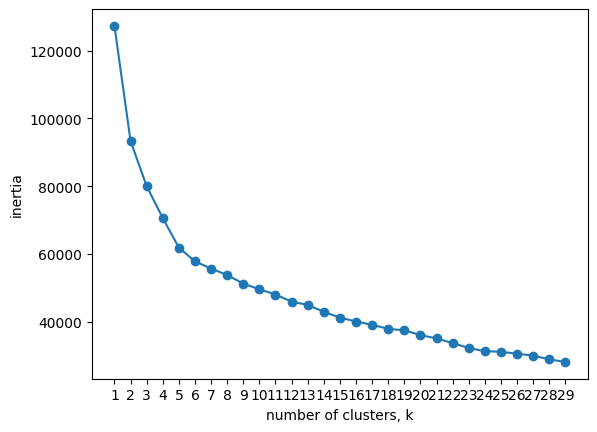

In [6]:

X=movements
ks = range(1, 30)
inertias = []
for k in ks:
    model = KMeans(n_clusters=k, n_init=10)
    model.fit(X)
    inertias.append(model.inertia_)
    
# Plot ks vs inertias
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [7]:
model = KMeans(n_clusters=8)
model.fit(X)

labels = model.predict(X)
print(labels)

[0 0 7 7 7 0 0 7 7 0 0 0 7 0 0 0 0 0 0 7 0 0 0 0 0 0 6 0 0 0 0 0 0 0 7 7 7
 0 1 0 7 7 0 0 0 0 7 0 0 0 0 0 0 7 0 0 0 0 4 7 0 0 0 0 7 0 0 0 0 6 0 5 0 0
 7 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 0 0 6 7 0 0 0 0 0 0 6 7 0 7 0 0
 0 0 7 0 7 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 7 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 7 0
 7 0 0 0 0 0 0 0 0 0 0 0 0 0 7 0 0 0 0 0 0 2 2 0 0 0 0 7 0 6 0 0 0 0 0 0 0
 7 0 0 7 0 0 0 7 0 0 0 0 0 0 0 0 0 7 7 0 7 0 7 0 0 0 7 0 0 0 0 0 6 0 7 0 0
 0 0 7 0 0 0 0 0 0 0 7 0 0 0 0 0 0 0 0 0 0 0 0 7 0 7 0 7 0 0 0 7 0 0 7 0 7
 0 0 7 0 0 0 0 7 7 0 0 0 0 7 0 7 0 7 0 0 0 0 0 0 0 0 0 0 7 5 0 0 0 0 0 0 0
 0 6 0 0 0 0 7 0 0 7 0 0 0 7 0 0 0 0 0 0 0 7 0 0 0 0 0 3 0 0 0 0 0 0 0 7 0
 0 0 0 0 7 0 0 0 0 0 7 0 0 0 0 7 7 0 0 0 7 7 0 6 0 0 0 0 0 0 7 7 0 0 0 7 0
 0 0 0 0 7 0 0 0 0 7 0 0 0 0 7 0 0 0 0 0 0 7 7 0 7 0 0 0 0 7 0 0 0 0 0 7 0
 0 7 0 0 0 0 0 0 0 0 0 0 0 0 7 7 0 7 0 7 0 7 7 0 0 0 0 7 0 0 0 7 0 0 7 0 0
 0 0 7 0 0 0 0 0 0 0 0 0 

C:\Users\usuar\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [8]:
changes_df['cluster'] = pd.Series(model.predict(X), index=changes_df.index)
display(changes_df)

date,Name,2017-12-06,2017-12-07,2017-12-08,2017-12-11,2017-12-12,2017-12-13,2017-12-14,2017-12-15,2017-12-18,...,2018-01-26,2018-01-29,2018-01-30,2018-01-31,2018-02-01,2018-02-02,2018-02-05,2018-02-06,2018-02-07,cluster
0,A,0.06,0.82,0.67,-0.38,0.06,-0.38,-0.17,1.10,0.05,...,0.96,-0.29,-1.54,0.44,-0.60,-1.58,-3.03,0.23,-0.39,0
1,AAL,0.14,1.27,0.14,0.28,-0.83,-0.38,0.12,0.85,0.43,...,0.02,-0.39,-0.09,1.73,-0.44,-1.78,-2.34,1.42,0.22,0
2,AAP,-3.65,0.11,2.70,0.54,2.18,-0.53,-2.30,0.50,2.01,...,2.72,-0.75,-3.62,-2.28,0.30,-3.36,-4.07,2.34,-2.27,7
3,AAPL,-0.63,0.31,0.05,3.30,-0.97,0.57,-0.05,1.75,2.45,...,0.40,-3.55,-0.99,0.46,0.35,-7.28,-4.01,6.54,-3.49,7
4,ABBV,-1.01,-0.16,1.71,0.52,-0.17,1.05,-1.05,1.15,0.74,...,14.91,-0.90,-6.43,-3.66,4.12,-1.17,-5.66,1.69,2.42,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,XYL,0.14,0.40,-0.19,-0.91,0.26,-0.05,-0.79,0.87,0.33,...,1.17,-1.00,-0.34,-0.81,2.58,0.82,-3.00,-1.33,0.46,0
501,YUM,0.14,-0.19,0.27,-0.87,-0.46,0.20,-0.15,0.26,0.81,...,0.54,0.28,-1.89,0.00,-0.61,-1.35,-2.83,0.78,-0.45,0
502,ZBH,0.29,-1.00,-1.40,0.13,0.03,-0.02,-0.70,2.42,-0.81,...,1.49,1.16,-1.45,1.18,1.07,-2.40,-2.61,-0.88,-1.52,0
503,ZION,-0.96,0.55,0.46,-0.99,0.52,-0.70,-0.54,0.79,0.97,...,1.00,0.17,-0.26,0.10,0.95,-0.83,-2.50,0.87,1.50,0


# Mean and Standard deviation 
Now let's get the mean and standard deviation for each cluster through time

In [9]:
cluster_changes_df_mean=changes_df.drop(columns='Name')
cluster_changes_df_mean=cluster_changes_df_mean.groupby('cluster').mean().reset_index()
cluster_changes_df_std=changes_df.drop(columns='Name')
cluster_changes_df_std=cluster_changes_df_std.groupby('cluster').std().reset_index()

In [10]:
cluster_changes_df_mean_unpivoted = cluster_changes_df_mean.melt(id_vars=['cluster'], var_name='date', value_name='stock_change_mean')
cluster_changes_df_std_unpivoted = cluster_changes_df_std.melt(id_vars=['cluster'], var_name='date', value_name='stock_change_std')


to_group=['cluster', 'date']

cluster_changes_df_mean_unpivoted = pd.merge(cluster_changes_df_mean_unpivoted, cluster_changes_df_std_unpivoted, on=to_group)
cluster_changes_df_mean_unpivoted['stock_change_std'] = cluster_changes_df_mean_unpivoted['stock_change_std'].fillna(0)

display(cluster_changes_df_mean_unpivoted)

,cluster,date,stock_change_mean,stock_change_std
0,0,2017-12-06,-0.097711,0.998090
1,1,2017-12-06,10.780000,0.000000
2,2,2017-12-06,13.175000,0.077782
3,3,2017-12-06,-5.840000,0.000000
4,4,2017-12-06,-14.110000,0.000000
...,...,...,...,...
339,3,2018-02-07,24.020000,0.000000
340,4,2018-02-07,-16.740000,0.000000
341,5,2018-02-07,0.860000,5.402296
342,6,2018-02-07,-8.085000,10.216569


# Visualization
Now let's see the mean and standard deviation behavior

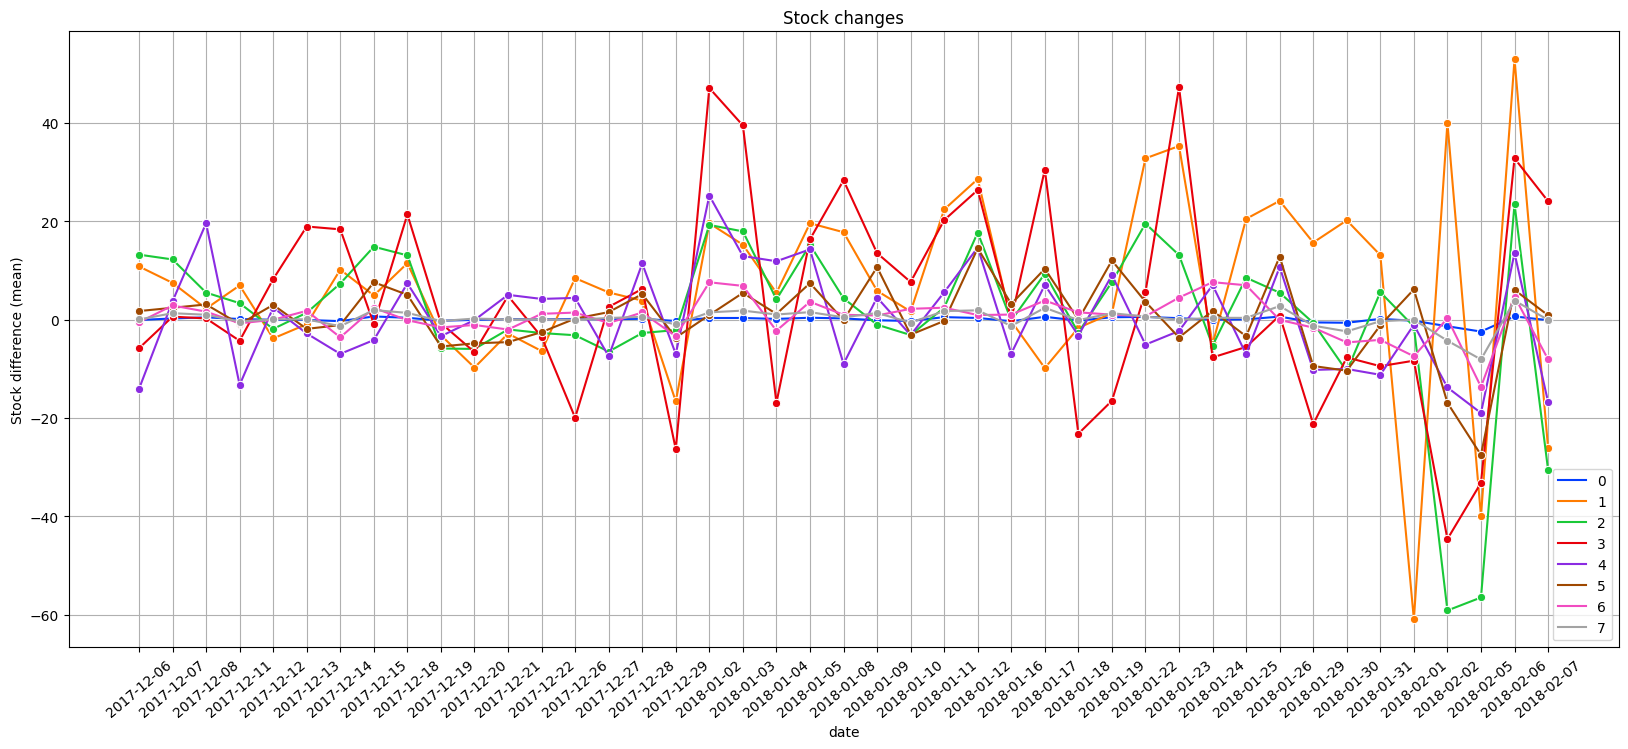

In [13]:
plt.figure(figsize=(20, 8))
sns.lineplot(x='date', y='stock_change_mean', data=cluster_changes_df_mean_unpivoted, marker='o', hue='cluster', palette='bright')

plt.title('Stock changes')
plt.ylabel('Stock difference (mean)')
plt.legend(loc='lower right')
plt.xticks(rotation=40)
plt.grid(True)
plt.show()


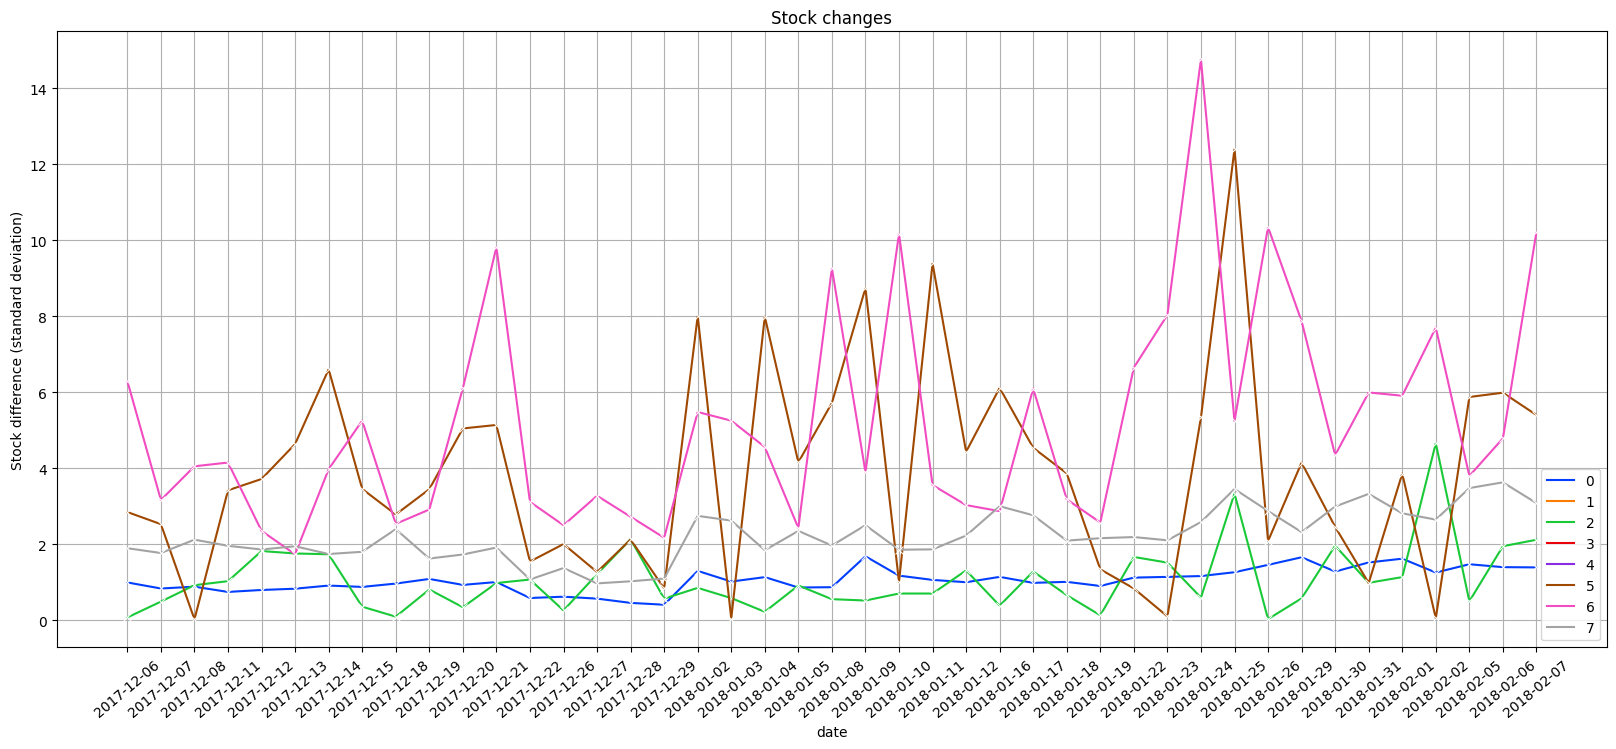

In [14]:
plt.figure(figsize=(20, 8))
sns.lineplot(x='date', y='stock_change_std', data=cluster_changes_df_std_unpivoted, marker='x', hue='cluster', palette='bright')
plt.title('Stock changes')
plt.ylabel('Stock difference (standard deviation)')
plt.legend(loc='lower right')
plt.xticks(rotation=40)
plt.grid(True)
plt.show()